In [1]:
#!pip install prophet

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [2]:
data = yf.Ticker('BTC-USD').history("Max")
df = pd.DataFrame(data)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2022-01-09,41734.726562,42663.949219,41338.160156,41911.601562,21294384372,0,0
2022-01-10,41910.230469,42199.484375,39796.570312,41821.261719,32104232331,0,0
2022-01-11,41819.507812,43001.156250,41407.753906,42735.855469,26327648900,0,0


In [3]:
df=df[['Close']]

In [4]:
df.columns = ['y']
df['ds'] = df.index

C:\Users\jingc\AppData\Local\Temp/ipykernel_14580/1072526961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = df.index


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


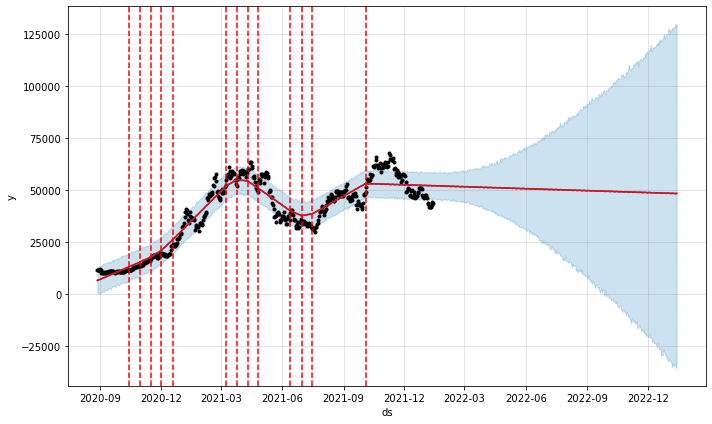

In [5]:
m = Prophet()
m.fit(df.iloc[-252*2:])
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

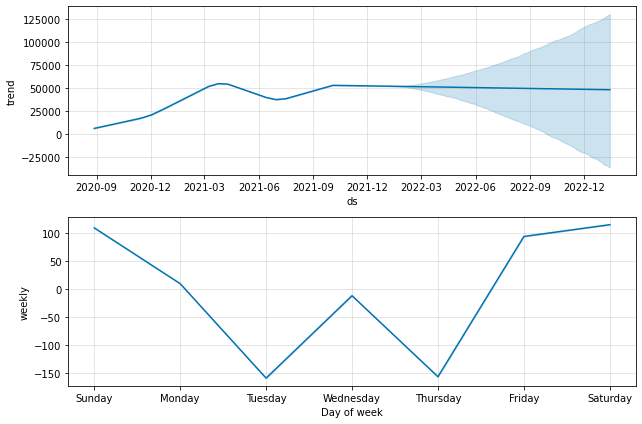

In [6]:
m.plot_components(forecast);

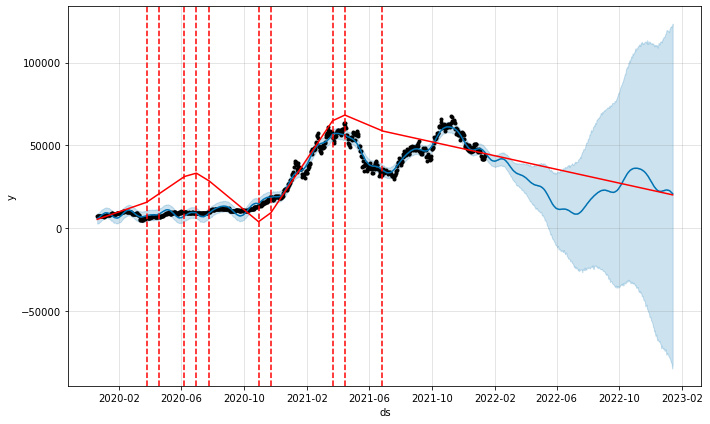

In [7]:
# BAD!!! From blog articles
m = Prophet(daily_seasonality=True)
m.fit(df.iloc[-252*3:])
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

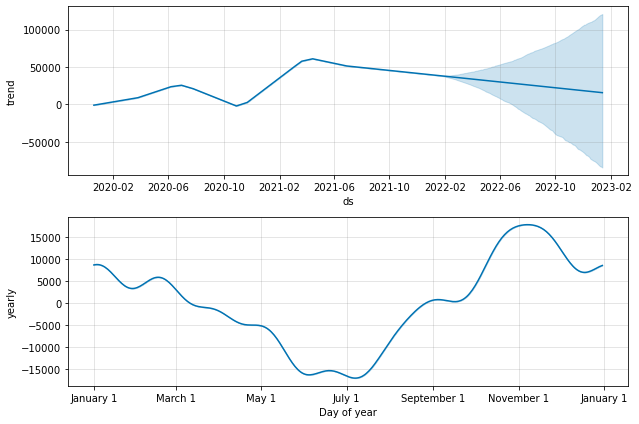

In [10]:
m.plot_components(forecast);

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


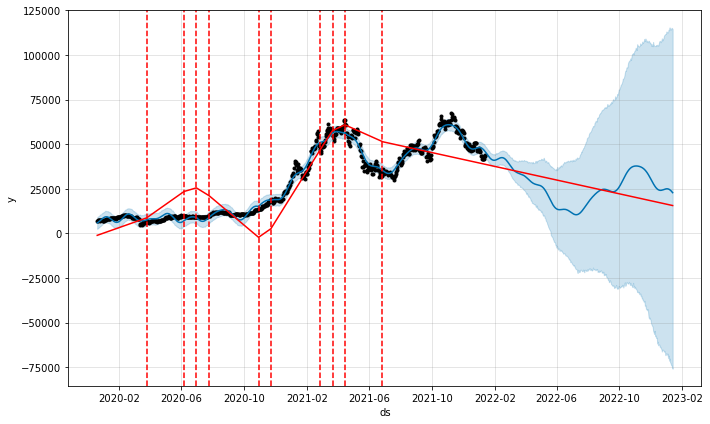

In [11]:
m = Prophet(weekly_seasonality=False)
m.fit(df.iloc[-252*3:])
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

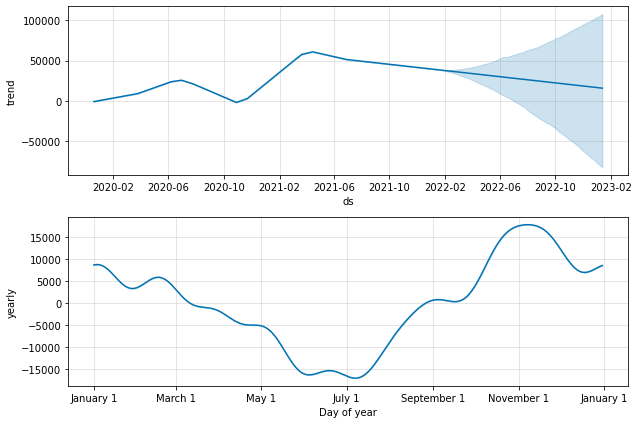

In [12]:
m.plot_components(forecast);

### Cross-Validation

In [13]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [14]:
m = Prophet(weekly_seasonality=False)

In [15]:
m.fit(df[-252*2:])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
# try period=15, horizon=30
# try period=30, horizon=60
df_cv = cross_validation(
    m,
    initial='365 days',
    period='5 days',
    horizon='5 days')

INFO:prophet:Making 27 forecasts with cutoffs between 2021-08-31 00:00:00 and 2022-01-08 00:00:00


  0%|          | 0/27 [00:00<?, ?it/s]

In [18]:
df_cv.head(20)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-01,45390.639967,41083.936363,49693.865124,48847.027344,2021-08-31
1,2021-09-02,45538.285035,40938.487285,49944.077003,49327.722656,2021-08-31
2,2021-09-03,45685.930103,41326.633922,50078.769061,50025.375000,2021-08-31
3,2021-09-04,45833.575171,41543.228501,50048.733947,49944.625000,2021-08-31
4,2021-09-05,45981.220239,41743.115954,50520.595594,51753.410156,2021-08-31
5,2021-09-06,47875.524123,43881.997223,52584.778459,52633.535156,2021-09-05
6,2021-09-07,48064.176358,43542.704785,52236.081247,46811.128906,2021-09-05
7,2021-09-08,48252.828592,43435.369717,52252.716444,46091.390625,2021-09-05
8,2021-09-09,48441.480827,43830.753412,52643.280947,46391.421875,2021-09-05
9,2021-09-10,48630.133061,44492.968923,52803.096652,44883.910156,2021-09-05


In [19]:
df_cv.shape

(135, 6)

In [20]:
naive = df_cv[['ds', 'yhat', 'y', 'cutoff']].copy()

In [21]:
naive_storage = np.zeros(naive.shape[0])
one_day = pd.Timedelta(1, 'day')
for i, row in naive.iterrows():
  cutoff = row['cutoff']
  # print(cutoff)

  # must find last cutoff that actually exists in df
  while cutoff not in df.index:
    cutoff = cutoff - one_day

  naive_storage[i] = df.loc[cutoff]['y']

naive['yhat'] = naive_storage

In [22]:
pm = performance_metrics(df_cv)
pm['smape'].mean()

0.13723010408343703

In [23]:
naive_metrics = performance_metrics(naive)
naive_metrics['smape'].mean()

0.043472128408788765

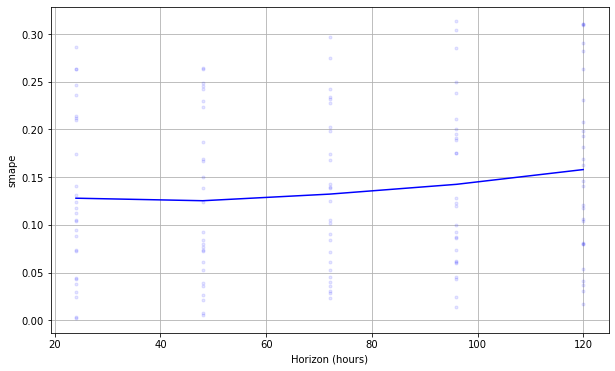

In [24]:
plot_cross_validation_metric(df_cv, metric='smape');

### Cross-validation with logged Data

In [25]:
log_df = df.copy()
log_df['y'] = np.log(df['y'])

In [26]:
m = Prophet(weekly_seasonality=False)
m.fit(log_df[-252*2:])
df_cv = cross_validation(
    m,
    initial='365 days',
    period='30 days',
    horizon='60 days')
pm = performance_metrics(df_cv)
pm['smape'].mean()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 3 forecasts with cutoffs between 2021-09-15 00:00:00 and 2021-11-14 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

0.018936528514925412

In [27]:
naive = df_cv[['ds', 'yhat', 'y', 'cutoff']].copy()
naive_storage = np.zeros(naive.shape[0])
for i, row in naive.iterrows():
  cutoff = row['cutoff']
  # print(cutoff)

  # must find last cutoff that actually exists in df
  while cutoff not in df.index:
    cutoff = cutoff - pd.Timedelta(1, 'day')

  naive_storage[i] = log_df.loc[cutoff]['y']

naive['yhat'] = naive_storage
naive_metrics = performance_metrics(naive)
naive_metrics['smape'].mean()

0.01610606481120874

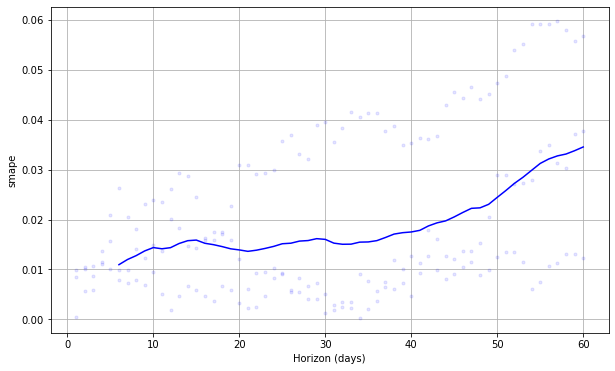

In [28]:
plot_cross_validation_metric(df_cv, metric='smape');